- The insurance.csv dataset contains 1338 observations (rows) and 7 features (columns). The dataset contains 4 numerical features (age, bmi, children and expenses) and 3 nominal features (sex, smoker and region) that were converted into factors with numerical value designated for each level.
- The purposes of this exercise to look into different features to observe their relationship, and plot a multiple linear regression based on several features of individual such as age, physical/family condition and location against their existing medical expense to be used for predicting future medical expenses of individuals that help medical insurance to make decision on charging the premium.


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config IPCompleter.greedy=True

insurance = pd.read_csv("insurance.csv")
# insurance.to_csv("Insurance data.csv")

insurance.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [2]:
import scipy
import numpy as np

In [4]:
insurance.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


- No Missing values.

In [3]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

In [6]:
insurance.loc[outliers_iqr(insurance["bmi"])]

,age,sex,bmi,children,smoker,region,expenses
116,58,male,49.1,0,no,southeast,11381.33
286,46,female,48.1,2,no,northeast,9432.93
401,47,male,47.5,1,no,southeast,8083.92
543,54,female,47.4,0,yes,southeast,63770.43
847,23,male,50.4,1,no,southeast,2438.06
860,37,female,47.6,2,yes,southwest,46113.51
1047,22,male,52.6,1,yes,southeast,44501.40
1088,52,male,47.7,1,no,southeast,9748.91
1317,18,male,53.1,0,no,southeast,1163.46


- Based on 'bmi', these values are Outlier values, mathematically. 
- Other numerical columns like age etc. can be similarly checked.
- Very few outliers in this column, across 1338 columns. No Treatment reqd.
- Expenses column or the amount being paid for the insurance premium, is the target/dependent variable.
- Categorical variables need to be converted into numbers. 

In [7]:
# Similar code as above for age
insurance.loc[outliers_iqr(insurance["age"])]

,age,sex,bmi,children,smoker,region,expenses


- No Outliers in 'age' column.

In [8]:
# Similar code as above for children
insurance.loc[outliers_iqr(insurance["children"])]

,age,sex,bmi,children,smoker,region,expenses


- No Outliers present in 'children' column.

In [4]:
print ("Rows     : " , insurance.shape[0])
print ("Columns  : " , insurance.shape[1])
print ("\nFeatures : \n" , insurance.columns.tolist())
print ("\nMissing values :  ", insurance.isnull().sum().values.sum())
print ("\nUnique values :  \n",insurance.nunique())

Rows     :  1338
Columns  :  7

Features : 
 ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses']

Missing values :   0

Unique values :  
 age           47
sex            2
bmi          275
children       6
smoker         2
region         4
expenses    1337
dtype: int64


- The dataset looks good to go.
- Since, the number of categorical variables are 2,2 & 4. Either One-hot or label encoding would be suitable, in converting these string values into numbers.

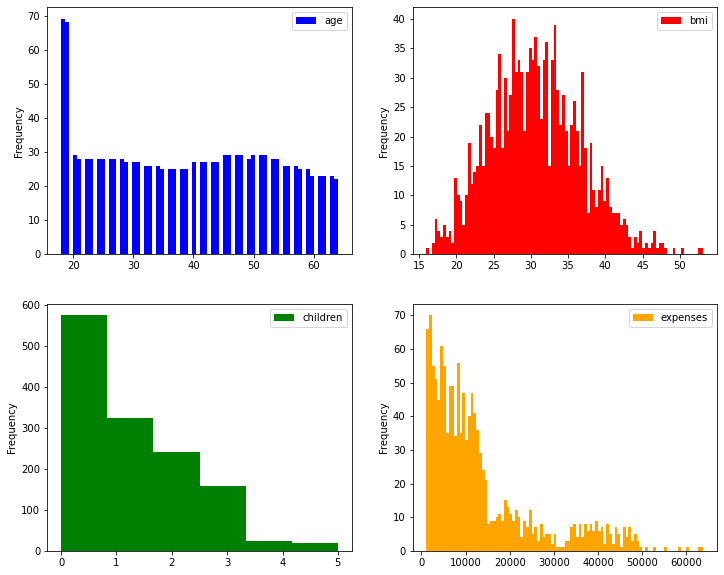

In [10]:
# Data exploration
# Univariate Distributions of the variables
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
insurance.plot(kind="hist", y="age", bins=70, color="b", ax=axes[0][0])
insurance.plot(kind="hist", y="bmi", bins=100, color="r", ax=axes[0][1])
insurance.plot(kind="hist", y="children", bins=6, color="g", ax=axes[1][0])
insurance.plot(kind="hist", y="expenses", bins=100, color="orange", ax=axes[1][1])
plt.show()

In [9]:
insurance.corr()

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


- There are a few correlations that are border-line intermediates, but no significant correlations present. In other words, weak correlations on an average.
- Correlations between 'Expenses' and the other independent attributes,indicate that the linear relationship is not a very good fit. 
- Since, the relationship doesn't appear to be linear, non-linear approaches can be looked into.
- No question of multi-collinearity.

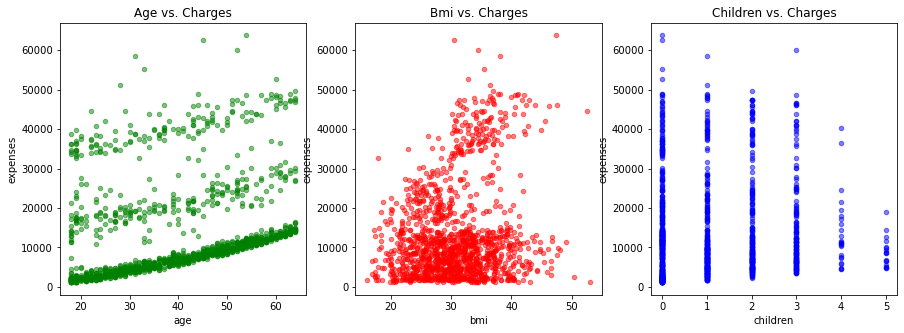

In [10]:
# Plot of independent variables vs Expenses
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
insurance.plot(kind='scatter', x='age', y='expenses', alpha=0.5, color='green', ax=axes[0], title="Age vs. Charges")
insurance.plot(kind='scatter', x='bmi', y='expenses', alpha=0.5, color='red', ax=axes[1], title="Bmi vs. Charges")
insurance.plot(kind='scatter', x='children', y='expenses', alpha=0.5, color='blue', ax=axes[2], title="Children vs. Charges")
plt.show()

- In Age vs Expenses, three distinct groups appear to be seen. It seems each of those groups can be understood linearly very well. But, unfortunately for the same two variables, 3 lines can't be drawn. This is why, correlation doesn't seem to be working.
- As Age increases, Expenses increases. Though, there are different levels to it. Each level has some kind of linear dependence.

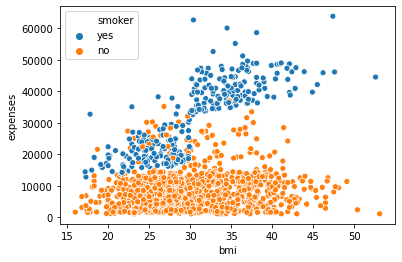

In [7]:
pal = ["#FA5858", "#58D3F7"]
sns.scatterplot(x="bmi", y="expenses", data=insurance, hue='smoker')

- Because of the 'smoker' column, this is happening. So, we realise a fact that 'smoker' is a useful column.

<AxesSubplot:xlabel='age', ylabel='expenses'>

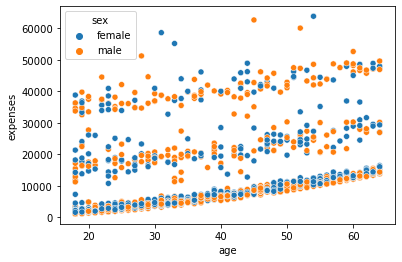

In [10]:
#Same code as above for identifying the cause of three different levels in 'age vs expenses' plot
pal = ["#FA5858", "#58D3F7"]
sns.scatterplot(x="age", y="expenses", data=insurance, hue='sex')

- Gender is not the cause for the difference between three levels.

<AxesSubplot:xlabel='age', ylabel='expenses'>

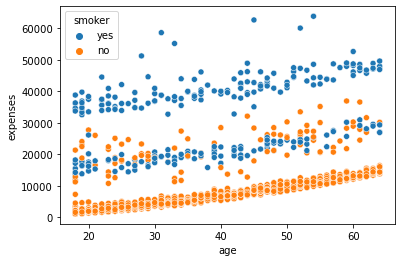

In [11]:
#Same code as above for identifying the cause of three different levels in 'age vs expenses' plot
pal = ["#FA5858", "#58D3F7"]
sns.scatterplot(x="age", y="expenses", data=insurance, hue='smoker')

- The reason behind that shift is the increase in the number of smokers. As the number of smokers in this group increases, the relative level goes up. So, it makes sense that 'smoker' is the variable that's actually causing this differentiation. So, linear pattern to this variable got disturbed, as a result of that 'smoker' column. Insurance has higher cost for the smokers.
- This coulumn is useful for deciding what the premiums are. 'High' or 'low', even if its a categorical attribute.
- As compared to the other variables, 'smoker' is definitely contributing significantly.

Text(0.5, 1.0, 'Smokers')

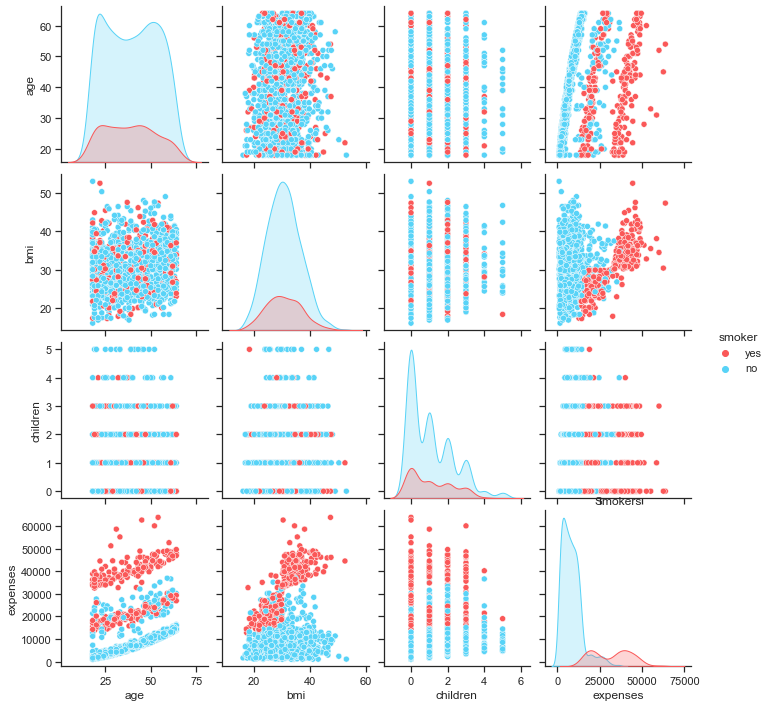

In [12]:
sns.set(style="ticks")
pal = ["#FA5858", "#58D3F7"]

sns.pairplot(insurance, hue="smoker", palette=pal) # Hue='smoker' added inside the Pairplot
plt.title("Smokers")

- A lot of people on a higher side of spectrum, are actually smokers.
- Scatterplots with categorical features, is not a good idea.
This plot is not very intuitive. Scatterplot is useful in case of continuous data.
- Vairable Bmi, which seems very close to normal atleast for one of the classes; for the other class it looks a little skewed, but not so much.
- Except for bmi, all other variables appear to be non-normal.
- Because of the skewness, a different kind of transformation would also be helpful. For instance, for this skewed data, logarithmic transformation or a min-max scale might also be helpful.

In [13]:
insurance['sex'].unique()

array(['female', 'male'], dtype=object)

In [14]:
insurance.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [32]:
insurance.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [33]:
# Label or integer encoding is possible, directly done here

#insurance['sex'] = insurance['sex'].map(lambda s :1  if s == 'female' else 0)
#insurance['smoker'] = insurance['smoker'].map(lambda s :1  if s == 'yes' else 0)

#insurance.head()

In [5]:
# One hot encoding

cat_col=['smoker','region','sex']
num_col=[i for i in insurance.columns if i not in cat_col]
num_col

['age', 'bmi', 'children', 'expenses']

- Either of these encoding techniques can be used.

In [6]:
one_hot=pd.get_dummies(insurance[cat_col])
insurance=pd.concat([insurance[num_col],one_hot],axis=1)
insurance.head(10)

,age,bmi,children,expenses,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male
0,19,27.9,0,16884.92,0,1,0,0,0,1,1,0
1,18,33.8,1,1725.55,1,0,0,0,1,0,0,1
2,28,33.0,3,4449.46,1,0,0,0,1,0,0,1
3,33,22.7,0,21984.47,1,0,0,1,0,0,0,1
4,32,28.9,0,3866.86,1,0,0,1,0,0,0,1
5,31,25.7,0,3756.62,1,0,0,0,1,0,1,0
6,46,33.4,1,8240.59,1,0,0,0,1,0,1,0
7,37,27.7,3,7281.51,1,0,0,1,0,0,1,0
8,37,29.8,2,6406.41,1,0,1,0,0,0,0,1
9,60,25.8,0,28923.14,1,0,0,1,0,0,1,0


- 12 columns out of which, there are 11 independent features. With these 11 features, we will create all Degree-2 terms for Polynomial Regression model.

In [7]:
X = insurance.drop(['expenses'], axis = 1)
y = insurance.expenses # Storing the Expenses in y

In [8]:
# Train test split

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) # 80-20 Train-Test Split

In [9]:
# Normalising the data is also an option

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)        

- Standard Scaled version of train and test
- Scaling only done for the X feature set, not for Y

In [14]:
# Min-Max scaling of the data

from numpy import asarray
from sklearn.preprocessing import MinMaxScaler

# define min max scaler
scaler = MinMaxScaler()

# transform data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
from sklearn.linear_model import LinearRegression  # Import Linear Regression model

multiple_linear_reg = LinearRegression(fit_intercept=False)  # Create a instance for Linear Regression model
multiple_linear_reg.fit(X_train, y_train)  # Fit data to the model

LinearRegression(fit_intercept=False)

- Standard Linear Regression run without any additional parameters.

In [12]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features = PolynomialFeatures(degree=2)  # Create a PolynomialFeatures instance in degree 2
# Second degree terms with all these combinations of variables will be formed
# Higher degree can also be tried for building models
x_train_poly = polynomial_features.fit_transform(X_train)  # Fit and transform the training data to polynomial
x_test_poly = polynomial_features.fit_transform(X_test)  # Fit and transform the testing data to polynomial

polynomial_reg = LinearRegression(fit_intercept=False)  # Create a instance for Linear Regression model
polynomial_reg.fit(x_train_poly, y_train)  # Fit data to the model

LinearRegression(fit_intercept=False)

In [13]:
x_train_poly.shape

(1070, 78)

- For determining the number of columns in polynomial regression model (Degree-2), is 12+12C2=78
- 12 is the number of features, post One-hot encoding. (Out[34] can be used to verify the number of columns)
- With each of these 78 variables, a Linear Regression model is fit, which can fit more complex relationships theoretically.

In [16]:
from sklearn.tree import DecisionTreeRegressor  # Import Decision Tree Regression model

decision_tree_reg = DecisionTreeRegressor(max_depth=8, random_state=13)  # Create a instance for Decision Tree Regression model
decision_tree_reg.fit(X_train, y_train)  # Fit data to the model
# Random State can be set to any number

DecisionTreeRegressor(max_depth=8, random_state=13)

In [14]:
from sklearn.ensemble import RandomForestRegressor  # Import Random Forest Regression model

random_forest_reg = RandomForestRegressor(n_estimators=500, max_depth=5, random_state=13)  # Create a instance for Random Forest Regression model
# Building with 500 trees to begin with
random_forest_reg.fit(X_train, y_train)  # Fit data to the model

RandomForestRegressor(max_depth=5, n_estimators=500, random_state=13)

In [19]:
from sklearn.svm import SVR  # Import SVR model

support_vector_reg = SVR(gamma=0.1, kernel="rbf", C=100000 )  # Create a instance for Support Vector Regression model
# Values of Arguments for C and gamma, can be altered to increase the accuracies of the model
support_vector_reg.fit(X_train, y_train)  # Fit data to the model

SVR(C=100000, gamma=0.1)

In [16]:
# Importing evaluation metrics

from sklearn.model_selection import cross_val_predict  # For K-Fold Cross Validation
from sklearn.metrics import r2_score  # For find accuracy with R2 Score or coefficient of determination
from sklearn.metrics import mean_squared_error  # For MSE
from math import sqrt  # For squareroot operation

In [23]:
## Accuracy with vanilla multiple linear regression

# Prediction with training dataset:
y_pred_MLR_train = multiple_linear_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_MLR_test = multiple_linear_reg.predict(X_test)

# Find training accuracy for this model:
accuracy_MLR_train = r2_score(y_train, y_pred_MLR_train)
print("Training Accuracy for Multiple Linear Regression Model: ", accuracy_MLR_train)

# Find testing accuracy for this model:
accuracy_MLR_test = r2_score(y_test, y_pred_MLR_test)
print("Testing Accuracy for Multiple Linear Regression Model: ", accuracy_MLR_test)

# Find RMSE for training data:
RMSE_MLR_train = sqrt(mean_squared_error(y_train, y_pred_MLR_train))
print("RMSE for Training Data: ", RMSE_MLR_train)

# Find RMSE for testing data:
RMSE_MLR_test = sqrt(mean_squared_error(y_test, y_pred_MLR_test))
print("RMSE for Testing Data: ", RMSE_MLR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_MLR = cross_val_predict(multiple_linear_reg, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_MLR = r2_score(y, y_pred_cv_MLR)
print("Accuracy for 10-Fold Cross Predicted Multiple Linaer Regression Model: ", accuracy_cv_MLR)

Training Accuracy for Multiple Linear Regression Model:  -0.47853008120571827
Testing Accuracy for Multiple Linear Regression Model:  -0.3300569682649874
RMSE for Training Data:  14559.229579026976
RMSE for Testing Data:  14548.261617299797
Accuracy for 10-Fold Cross Predicted Multiple Linaer Regression Model:  0.7476018110609117


- Negative R2 indicates that the model is going against what the trend should be.
- When doing it across 10 Folds, overall R2 score obtained is 0.7476018110609117. But over the train and test, that we created, we obtained a very poor value for R2 score. This is an indication of lack of robustness.
- The average value obtained is so different from individual number obtained, i.e. -0.4787. This is an indication that the model is not so robust. So, clearly the linear model is not doing so well.
- RMSE values, from the generalisability point of view, don't seem to be very different. RMSE values are very similar.
- 13270 is the average premium people are paying. And on an average, you are making a mistake of 14000. Thats little more than 100% error (14500/13270)>1). So, on an average we are off by that number. Since the error level is pretty high, its not a good model.
- Better and more accurate way of doing would be to actually calculate MAPE(Mean Absolute Percentage Error) Its a number that gives percentage error, which is a more accurate way of understanding how much error we are making in our predictions.
- Instead of R2 score, RMSE can be used.
- R2 score is merely correlation between the actuals and predicted.
- Accuracy is the difference between actuals and predicted.

In [26]:
## Checking accuracy with Linear model with polynomial features

# Prediction with training dataset:
y_pred_PR_train = polynomial_reg.predict(x_train_poly)

# Prediction with testing dataset:
y_pred_PR_test = polynomial_reg.predict(x_test_poly)

# Find training accuracy for this model:
accuracy_PR_train = r2_score(y_train, y_pred_PR_train)
print("Training Accuracy for Polynomial Regression Model: ", accuracy_PR_train)

# Find testing accuracy for this model:
accuracy_PR_test = r2_score(y_test, y_pred_PR_test)
print("Testing Accuracy for Polynomial Regression Model: ", accuracy_PR_test)

# Find RMSE for training data:
RMSE_PR_train = sqrt(mean_squared_error(y_train, y_pred_PR_train))
print("RMSE for Training Data: ", RMSE_PR_train)

# Find RMSE for testing data:
RMSE_PR_test = sqrt(mean_squared_error(y_test, y_pred_PR_test))
print("RMSE for Testing Data: ", RMSE_PR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_PR = cross_val_predict(polynomial_reg, polynomial_features.fit_transform(X), y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_PR = r2_score(y, y_pred_cv_PR)
print("Accuracy for 10-Fold Cross Predicted Polynomial Regression Model: ", accuracy_cv_PR)

Training Accuracy for Polynomial Regression Model:  0.8371470246304638
Testing Accuracy for Polynomial Regression Model:  0.8812888899557323
RMSE for Training Data:  4831.935859828911
RMSE for Testing Data:  4346.3196550017865
Accuracy for 10-Fold Cross Predicted Polynomial Regression Model:  0.8378997722260932


- R2 score has improved. 
- With 2-degree polynomials, with the second degree terms (of the same set of features) added, the model is much better at predicting the same set of values. We have faciliated a more complex line to get created, to fit the data. The line, now created, coz it has higher degree terms, is no longer a line, its a curve. This complex curve is able to fit the data better.
- Model is also robust, as the training accuracy and the 10-folds accuracy are very similar to each other. Across different folds, similar accuracy is obtained.
- RMSE has also decreased sharply. Low RMSE is a good thing.
- Linear model with polynomial features, fared better than the Simple Linear Model which was trying to fit a line.

In [30]:
## Checking accuracy with Decision trees 

# Prediction with training dataset:
y_pred_DTR_train = decision_tree_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_DTR_test = decision_tree_reg.predict(X_test)

# Find training accuracy for this model:
accuracy_DTR_train = r2_score(y_train, y_pred_DTR_train)
print("Training Accuracy for Decision Tree Regression Model: ", accuracy_DTR_train)

# Find testing accuracy for this model:
accuracy_DTR_test = r2_score(y_test, y_pred_DTR_test)
print("Testing Accuracy for Decision Tree Regression Model: ", accuracy_DTR_test)

# Find RMSE for training data:
RMSE_DTR_train = sqrt(mean_squared_error(y_train, y_pred_DTR_train))
print("RMSE for Training Data: ", RMSE_DTR_train)

# Find RMSE for testing data:
RMSE_DTR_test = sqrt(mean_squared_error(y_test, y_pred_DTR_test))
print("RMSE for Testing Data: ", RMSE_DTR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_DTR = cross_val_predict(decision_tree_reg, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_DTR = r2_score(y, y_pred_cv_DTR)
print("Accuracy for 10-Fold Cross Predicted Decision Tree Regression Model: ", accuracy_cv_DTR)

Training Accuracy for Decision Tree Regression Model:  0.9354689685047128
Testing Accuracy for Decision Tree Regression Model:  0.7554226321375284
RMSE for Training Data:  3041.6386314416386
RMSE for Testing Data:  6238.556522714169
Accuracy for 10-Fold Cross Predicted Decision Tree Regression Model:  0.780246572737177


- For a fixed random state number, these numbers will be consistent for this machine. Setting the same random number helps in reproducibility of results.
- Overfitting is a problem here. DT has overfit. This problem can be overcome by reducing the max_depth. More number of levels means more complexity.

In [31]:
# Same code as above, with reducing the max_depth value 
from sklearn.tree import DecisionTreeRegressor  # Import Decision Tree Regression model

decision_tree_reg = DecisionTreeRegressor(max_depth=6, random_state=13)  # Create a instance for Decision Tree Regression model
decision_tree_reg.fit(X_train, y_train)  # Fit data to the model
# Random State can be set to any number

DecisionTreeRegressor(max_depth=6, random_state=13)

In [32]:
# Same code as above, to check the results for max_depth=6
## Checking accuracy with Decision trees 

# Prediction with training dataset:
y_pred_DTR_train = decision_tree_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_DTR_test = decision_tree_reg.predict(X_test)

# Find training accuracy for this model:
accuracy_DTR_train = r2_score(y_train, y_pred_DTR_train)
print("Training Accuracy for Decision Tree Regression Model: ", accuracy_DTR_train)

# Find testing accuracy for this model:
accuracy_DTR_test = r2_score(y_test, y_pred_DTR_test)
print("Testing Accuracy for Decision Tree Regression Model: ", accuracy_DTR_test)

# Find RMSE for training data:
RMSE_DTR_train = sqrt(mean_squared_error(y_train, y_pred_DTR_train))
print("RMSE for Training Data: ", RMSE_DTR_train)

# Find RMSE for testing data:
RMSE_DTR_test = sqrt(mean_squared_error(y_test, y_pred_DTR_test))
print("RMSE for Testing Data: ", RMSE_DTR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_DTR = cross_val_predict(decision_tree_reg, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_DTR = r2_score(y, y_pred_cv_DTR)
print("Accuracy for 10-Fold Cross Predicted Decision Tree Regression Model: ", accuracy_cv_DTR)

Training Accuracy for Decision Tree Regression Model:  0.8905492542217014
Testing Accuracy for Decision Tree Regression Model:  0.8302333848288863
RMSE for Training Data:  3961.2538515388947
RMSE for Testing Data:  5197.591286628548
Accuracy for 10-Fold Cross Predicted Decision Tree Regression Model:  0.8280980375058311


- Better results, but still there is scope for improvement.
- 10-fold accuracy is 83% on train.

In [34]:
# Same code as above, with reducing the max_depth value 
from sklearn.tree import DecisionTreeRegressor  # Import Decision Tree Regression model

decision_tree_reg = DecisionTreeRegressor(max_depth=4, random_state=13)  # Create a instance for Decision Tree Regression model
decision_tree_reg.fit(X_train, y_train)  # Fit data to the model
# Random State can be set to any number

DecisionTreeRegressor(max_depth=4, random_state=13)

In [35]:
# Same code as above, to check the results for max_depth=6
## Checking accuracy with Decision trees 

# Prediction with training dataset:
y_pred_DTR_train = decision_tree_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_DTR_test = decision_tree_reg.predict(X_test)

# Find training accuracy for this model:
accuracy_DTR_train = r2_score(y_train, y_pred_DTR_train)
print("Training Accuracy for Decision Tree Regression Model: ", accuracy_DTR_train)

# Find testing accuracy for this model:
accuracy_DTR_test = r2_score(y_test, y_pred_DTR_test)
print("Testing Accuracy for Decision Tree Regression Model: ", accuracy_DTR_test)

# Find RMSE for training data:
RMSE_DTR_train = sqrt(mean_squared_error(y_train, y_pred_DTR_train))
print("RMSE for Training Data: ", RMSE_DTR_train)

# Find RMSE for testing data:
RMSE_DTR_test = sqrt(mean_squared_error(y_test, y_pred_DTR_test))
print("RMSE for Testing Data: ", RMSE_DTR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_DTR = cross_val_predict(decision_tree_reg, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_DTR = r2_score(y, y_pred_cv_DTR)
print("Accuracy for 10-Fold Cross Predicted Decision Tree Regression Model: ", accuracy_cv_DTR)

Training Accuracy for Decision Tree Regression Model:  0.857987286659203
Testing Accuracy for Decision Tree Regression Model:  0.8802320436057114
RMSE for Training Data:  4512.185281427831
RMSE for Testing Data:  4365.62371992602
Accuracy for 10-Fold Cross Predicted Decision Tree Regression Model:  0.8508236806420276


- This is even better than the earlier one.
- RMSE has reduced. 
- 10 fold accuracy is 85% on train. So, slightly more accurate than the polynomial model.
- Very Generalisable.
- So, just playing around with max_depth, changes this model to a large degree.
- Tuning will be done later.

In [23]:
## Checking accuracy with vanilla Random forests

# Prediction with training dataset:
y_pred_RFR_train = random_forest_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_RFR_test = random_forest_reg.predict(X_test)

# Find training accuracy for this model:
accuracy_RFR_train = r2_score(y_train, y_pred_RFR_train)
print("Training Accuracy for Random Forest Regression Model: ", accuracy_RFR_train)

# Find testing accuracy for this model:
accuracy_RFR_test = r2_score(y_test, y_pred_RFR_test)
print("Testing Accuracy for Random Forest Regression Model: ", accuracy_RFR_test)

# Find RMSE for training data:
RMSE_RFR_train = sqrt(mean_squared_error(y_train, y_pred_RFR_train))
print("RMSE for Training Data: ", RMSE_RFR_train)

# Find RMSE for testing data:
RMSE_RFR_test = sqrt(mean_squared_error(y_test, y_pred_RFR_test))
print("RMSE for Testing Data: ", RMSE_RFR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_RFR = cross_val_predict(random_forest_reg, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_RFR = r2_score(y, y_pred_cv_RFR)
print("Accuracy for 10-Fold Cross Predicted Random Forest Regression Model: ", accuracy_cv_RFR)

Training Accuracy for Random Forest Regression Model:  0.8831275238406227
Testing Accuracy for Random Forest Regression Model:  0.8952529450752874
RMSE for Training Data:  4093.355224028489
RMSE for Testing Data:  4082.6945721675384
Accuracy for 10-Fold Cross Predicted Random Forest Regression Model:  0.8589831370501735


- Generalisable
- RF has better accuracy than trees.
- All these non-linear approaches are doing better than the simple linear model that we built.
- Forests doing better than trees; trees doing better than the Linear model with Polynomial features
- Min-max scale, (instead of Normalised scale) might give better results.

In [22]:
# Same code as above for min-max scaled data
## Checking accuracy with vanilla Random forests

# Prediction with training dataset:
y_pred_RFR_train = random_forest_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_RFR_test = random_forest_reg.predict(X_test)

# Find training accuracy for this model:
accuracy_RFR_train = r2_score(y_train, y_pred_RFR_train)
print("Training Accuracy for Random Forest Regression Model: ", accuracy_RFR_train)

# Find testing accuracy for this model:
accuracy_RFR_test = r2_score(y_test, y_pred_RFR_test)
print("Testing Accuracy for Random Forest Regression Model: ", accuracy_RFR_test)

# Find RMSE for training data:
RMSE_RFR_train = sqrt(mean_squared_error(y_train, y_pred_RFR_train))
print("RMSE for Training Data: ", RMSE_RFR_train)

# Find RMSE for testing data:
RMSE_RFR_test = sqrt(mean_squared_error(y_test, y_pred_RFR_test))
print("RMSE for Testing Data: ", RMSE_RFR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_RFR = cross_val_predict(random_forest_reg, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_RFR = r2_score(y, y_pred_cv_RFR)
print("Accuracy for 10-Fold Cross Predicted Random Forest Regression Model: ", accuracy_cv_RFR)

Training Accuracy for Random Forest Regression Model:  0.8831337294288861
Testing Accuracy for Random Forest Regression Model:  0.8953317690639867
RMSE for Training Data:  4093.2465499626637
RMSE for Testing Data:  4081.1581335700234
Accuracy for 10-Fold Cross Predicted Random Forest Regression Model:  0.8589831370501735


- There is a slight improvement in the accuracies for min-max-scaled data, vis-a-vis the accuracies obtained for standard scaled data.

In [27]:
## Checking accuracy with vanilla SVMs

# Prediction with training dataset:
y_pred_SVR_train = support_vector_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_SVR_test = support_vector_reg.predict(X_test)

# Find training accuracy for this model:
accuracy_SVR_train = r2_score(y_train, y_pred_SVR_train)
print("Training Accuracy for Support Vector Regression Model: ", accuracy_SVR_train)

# Find testing accuracy for this model:
accuracy_SVR_test = r2_score(y_test, y_pred_SVR_test)
print("Testing Accuracy for Support Vector Regression Model: ", accuracy_SVR_test)

# Find RMSE for training data:
RMSE_SVR_train = sqrt(mean_squared_error(y_train, y_pred_SVR_train))
print("RMSE for Training Data: ", RMSE_SVR_train)

# Find RMSE for testing data:
RMSE_SVR_test = sqrt(mean_squared_error(y_test, y_pred_SVR_test))
print("RMSE for Testing Data: ", RMSE_SVR_test)

Training Accuracy for Support Vector Regression Model:  0.7454688597040092
Testing Accuracy for Support Vector Regression Model:  0.7775422874862461
RMSE for Training Data:  6040.790488928649
RMSE for Testing Data:  5949.763655047545


- SVMs are not performing well. This is because SVMs are not known to be very good regressors. They are good classifiers.
- Scaling the data, prior to performing SVMs is advisable.
- SVMs have unique applications in very small datasets with very high dimensionality.

In [20]:
# Same code as above for min-max-scaled data
## Checking accuracy with vanilla SVMs

# Prediction with training dataset:
y_pred_SVR_train = support_vector_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_SVR_test = support_vector_reg.predict(X_test)

# Find training accuracy for this model:
accuracy_SVR_train = r2_score(y_train, y_pred_SVR_train)
print("Training Accuracy for Support Vector Regression Model: ", accuracy_SVR_train)

# Find testing accuracy for this model:
accuracy_SVR_test = r2_score(y_test, y_pred_SVR_test)
print("Testing Accuracy for Support Vector Regression Model: ", accuracy_SVR_test)

# Find RMSE for training data:
RMSE_SVR_train = sqrt(mean_squared_error(y_train, y_pred_SVR_train))
print("RMSE for Training Data: ", RMSE_SVR_train)

# Find RMSE for testing data:
RMSE_SVR_test = sqrt(mean_squared_error(y_test, y_pred_SVR_test))
print("RMSE for Testing Data: ", RMSE_SVR_test)

Training Accuracy for Support Vector Regression Model:  0.8168830142003797
Testing Accuracy for Support Vector Regression Model:  0.8668613816584164
RMSE for Training Data:  5123.7464144636215
RMSE for Testing Data:  4602.862522855855


- Accuracies have drastically improved by simple tuning parameters like C(100000) and gamma(0.1). 
- Models are more generalisable.
- Model is made more complex by increasing C and increasing gamma both.

In [15]:
# Same code as above for standard-scaled data
## Checking accuracy with vanilla SVMs

# Prediction with training dataset:
y_pred_SVR_train = support_vector_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_SVR_test = support_vector_reg.predict(X_test)

# Find training accuracy for this model:
accuracy_SVR_train = r2_score(y_train, y_pred_SVR_train)
print("Training Accuracy for Support Vector Regression Model: ", accuracy_SVR_train)

# Find testing accuracy for this model:
accuracy_SVR_test = r2_score(y_test, y_pred_SVR_test)
print("Testing Accuracy for Support Vector Regression Model: ", accuracy_SVR_test)

# Find RMSE for training data:
RMSE_SVR_train = sqrt(mean_squared_error(y_train, y_pred_SVR_train))
print("RMSE for Training Data: ", RMSE_SVR_train)

# Find RMSE for testing data:
RMSE_SVR_test = sqrt(mean_squared_error(y_test, y_pred_SVR_test))
print("RMSE for Testing Data: ", RMSE_SVR_test)

Training Accuracy for Support Vector Regression Model:  0.8434714829968097
Testing Accuracy for Support Vector Regression Model:  0.8827537569378983
RMSE for Training Data:  4737.181747030783
RMSE for Testing Data:  4319.420136413186


- Training and Test accuracies of standard scaled data are even better than, the respective accuracies of min-max-scaled data.
- Generalisable model obtained.

In [52]:
# Compare all results in one table
training_accuracies = [accuracy_MLR_train, accuracy_PR_train, accuracy_DTR_train, accuracy_RFR_train, accuracy_SVR_train]
testing_accuracies = [accuracy_MLR_test, accuracy_PR_test, accuracy_DTR_test, accuracy_RFR_test, accuracy_SVR_test]
training_RMSE = [RMSE_MLR_train, RMSE_PR_train, RMSE_DTR_train, RMSE_RFR_train, RMSE_SVR_train]
testing_RMSE = [RMSE_MLR_test, RMSE_PR_test, RMSE_DTR_test, RMSE_RFR_test, RMSE_SVR_test]
cv_accuracies = [accuracy_cv_MLR, accuracy_cv_PR, accuracy_cv_DTR, accuracy_cv_RFR, "NA"]

parameters = ["fit_intercept=False", "fit_intercept=False", "max_depth=4", "n_estimators=500, max_depth=4", "kernel=”rbf”, C=1000"]

table_data = {"Parameters": parameters, "Training Accuracy": training_accuracies, "Testing Accuracy": testing_accuracies, 
              "Training RMSE": training_RMSE, "Testing RMSE": testing_RMSE, "10-Fold Score": cv_accuracies}
model_names = ["Multiple Linear Regression", "Polynomial Regression", "Decision Tree Regression", "Random Forest Regression", "Support Vector Regression"]

table_dataframe = pd.DataFrame(data=table_data, index=model_names)
table_dataframe

,Parameters,Training Accuracy,Testing Accuracy,Training RMSE,Testing RMSE,10-Fold Score
Multiple Linear Regression,fit_intercept=False,-0.478530,-0.330057,14559.229579,14548.261617,0.747602
Polynomial Regression,fit_intercept=False,0.836594,0.881911,4840.136052,4334.910016,0.837912
Decision Tree Regression,max_depth=4,0.857987,0.880232,4512.185281,4365.623720,0.850824
Random Forest Regression,"n_estimators=500, max_depth=4",0.867515,0.896975,4358.193964,4049.000337,0.858738
Support Vector Regression,"kernel=”rbf”, C=1000",0.841712,0.883920,4763.733236,4297.882827,NA


- RFs is giving the highest 10-fold training accuracies.
- In terms of testing RMSE, RFs is giving the lowest testing Testing RMSE.
- A lot of these models are behaving similarly.


In [19]:
## Hyperparameter tuning in Decision trees

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

params = { 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeRegressor(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, n_jobs=-1, verbose=1, cv=5)# Scoring metric can also be set 
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeRegressor(**best_params)
tree_clf.fit(X_train, y_train)

## Checking accuracy with Tuned RFs## Checking accuracy with Tuned RFs

Fitting 5 folds for each of 2166 candidates, totalling 10830 fits
Best paramters: {'max_depth': 4, 'min_samples_leaf': 14, 'min_samples_split': 2, 'splitter': 'best'})


DecisionTreeRegressor(max_depth=4, min_samples_leaf=14)

- Scoring metric can also be set. Here, Scoring is set to Default value. In GridSearchCV, the default value is RMSE. So, here based on RMSE, this calculation is happening. It can be changed to something else.

In [20]:
## Checking accuracy with above Tuned DTs

# Prediction with training dataset:
y_pred_DTR_train = tree_clf.predict(X_train)

# Prediction with testing dataset:
y_pred_DTR_test = tree_clf.predict(X_test)

# Find RMSE for training data:
RMSE_DTR_train = sqrt(mean_squared_error(y_train, y_pred_DTR_train))
print("RMSE for Training Data: ", RMSE_DTR_train)

# Find RMSE for testing data:
RMSE_DTR_test = sqrt(mean_squared_error(y_test, y_pred_DTR_test))
print("RMSE for Testing Data: ", RMSE_DTR_test)

# Find training accuracy for this model:
accuracy_DTR_train = r2_score(y_train, y_pred_DTR_train)
print("Training Accuracy for Decision Tree Regression Model: ", accuracy_DTR_train)

# Find testing accuracy for this model:
accuracy_DTR_test = r2_score(y_test, y_pred_DTR_test)
print("Testing Accuracy for Decision Tree Regression Model: ", accuracy_DTR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_DTR = cross_val_predict(tree_clf, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_DTR = r2_score(y, y_pred_cv_DTR)
print("Accuracy for 10-Fold Cross Predicted Decision Tree Regression Model: ", accuracy_cv_DTR)

RMSE for Training Data:  4529.0709451457815
RMSE for Testing Data:  4157.1927671362255
Training Accuracy for Decision Tree Regression Model:  0.8569224075936374
Testing Accuracy for Decision Tree Regression Model:  0.8913953640004728
Accuracy for 10-Fold Cross Predicted Decision Tree Regression Model:  0.8519152489746703


- 10-Fold Cross validation R2 score is very close R2 score for train.
- Very decently generalisable.
- Compared to the vanilla tree performance in the common table above, RMSE values of tuned DTs have decreased. Similar results as those obtained with vanilla models.
- max_depth=4 (as a result of Hyper-parameter tuning) matches the one selected for vanilla DTs. Thus, the depth parameter has been fairly tuned.

In [55]:
## Hyperparameter tuning in Random forests

n_estimators = [100, 500, 1000, 1500]
max_features = ['auto', 'sqrt']
max_depth = [2,3,4,5,6]
max_depth.append(None)
#min_samples_split = [2, 5, 10]
#min_samples_leaf = [1, 2, 4, 10]


params_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth} #'min_samples_split': min_samples_split,
               #'min_samples_leaf': min_samples_leaf}


rf_clf = RandomForestRegressor(random_state=42)

rf_cv = GridSearchCV(rf_clf, params_grid, cv=3, verbose=2,n_jobs = -1)


rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestRegressor(**best_params)
rf_clf.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] max_depth=2, max_features=auto, n_estimators=100 ................
[CV] . max_depth=2, max_features=auto, n_estimators=100, total=   0.1s
[CV] max_depth=2, max_features=auto, n_estimators=100 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] . max_depth=2, max_features=auto, n_estimators=100, total=   0.1s
[CV] max_depth=2, max_features=auto, n_estimators=100 ................
[CV] . max_depth=2, max_features=auto, n_estimators=100, total=   0.1s
[CV] max_depth=2, max_features=auto, n_estimators=500 ................
[CV] . max_depth=2, max_features=auto, n_estimators=500, total=   0.6s
[CV] max_depth=2, max_features=auto, n_estimators=500 ................
[CV] . max_depth=2, max_features=auto, n_estimators=500, total=   0.5s
[CV] max_depth=2, max_features=auto, n_estimators=500 ................
[CV] . max_depth=2, max_features=auto, n_estimators=500, total=   0.5s
[CV] max_depth=2, max_features=auto, n_estimators=1000 ...............
[CV]  max_depth=2, max_features=auto, n_estimators=1000, total=   1.1s
[CV] max_depth=2, max_features=auto, n_estimators=1000 ...............
[CV]  max_depth=2, max_features=auto, n_estimators=1000, total=   1.1s
[CV] max_depth=2, max_features=auto, n_estimators=1000 ...............
[CV]  

[CV]  max_depth=4, max_features=auto, n_estimators=1500, total=   2.1s
[CV] max_depth=4, max_features=sqrt, n_estimators=100 ................
[CV] . max_depth=4, max_features=sqrt, n_estimators=100, total=   0.1s
[CV] max_depth=4, max_features=sqrt, n_estimators=100 ................
[CV] . max_depth=4, max_features=sqrt, n_estimators=100, total=   0.1s
[CV] max_depth=4, max_features=sqrt, n_estimators=100 ................
[CV] . max_depth=4, max_features=sqrt, n_estimators=100, total=   0.1s
[CV] max_depth=4, max_features=sqrt, n_estimators=500 ................
[CV] . max_depth=4, max_features=sqrt, n_estimators=500, total=   0.6s
[CV] max_depth=4, max_features=sqrt, n_estimators=500 ................
[CV] . max_depth=4, max_features=sqrt, n_estimators=500, total=   0.6s
[CV] max_depth=4, max_features=sqrt, n_estimators=500 ................
[CV] . max_depth=4, max_features=sqrt, n_estimators=500, total=   0.5s
[CV] max_depth=4, max_features=sqrt, n_estimators=1000 ...............
[CV]  

[CV]  max_depth=6, max_features=sqrt, n_estimators=1500, total=   1.6s
[CV] max_depth=6, max_features=sqrt, n_estimators=1500 ...............
[CV]  max_depth=6, max_features=sqrt, n_estimators=1500, total=   1.6s
[CV] max_depth=6, max_features=sqrt, n_estimators=1500 ...............
[CV]  max_depth=6, max_features=sqrt, n_estimators=1500, total=   1.9s
[CV] max_depth=None, max_features=auto, n_estimators=100 .............
[CV]  max_depth=None, max_features=auto, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=auto, n_estimators=100 .............
[CV]  max_depth=None, max_features=auto, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=auto, n_estimators=100 .............
[CV]  max_depth=None, max_features=auto, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=auto, n_estimators=500 .............
[CV]  max_depth=None, max_features=auto, n_estimators=500, total=   1.4s
[CV] max_depth=None, max_features=auto, n_estimators=500 ............

[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:  2.5min finished


Best parameters: {'max_depth': 4, 'max_features': 'auto', 'n_estimators': 1500}


RandomForestRegressor(max_depth=4, n_estimators=1500)

- 1500 trees as compared to the 500 trees that we built.
- max_depth is again 4, after hyper-paramter tuning

In [56]:
## Checking accuracy with Tuned RFs

# Prediction with training dataset:
y_pred_RFR_train = rf_clf.predict(X_train)

# Prediction with testing dataset:
y_pred_RFR_test = rf_clf.predict(X_test)

# Find RMSE for training data:
RMSE_RFR_train = sqrt(mean_squared_error(y_train, y_pred_RFR_train))
print("RMSE for Training Data: ", RMSE_RFR_train)

# Find RMSE for testing data:
RMSE_RFR_test = sqrt(mean_squared_error(y_test, y_pred_RFR_test))
print("RMSE for Testing Data: ", RMSE_RFR_test)


RMSE for Training Data:  4357.51222289681
RMSE for Testing Data:  4045.623889679928


In [24]:
## Hyper parameter tuning the SVM

from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 0.5, 1, 10, 100,1000,10000,100000], 
              'gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001], 
              'kernel': ['rbf', 'linear']} 

grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=1, cv=5,n_jobs = -1)
grid.fit(X_train, y_train)

best_params = grid.best_params_
print(f"Best params: {best_params}")

svm_clf = SVR(**best_params)
svm_clf.fit(X_train, y_train)

Fitting 5 folds for each of 126 candidates, totalling 630 fits
Best params: {'C': 100000, 'gamma': 0.01, 'kernel': 'rbf'}


SVR(C=100000, gamma=0.01)

- The best results obtained with SVM are when C=100000, gamma=0.01.

In [26]:
## Checking accuracy with Tuned SVMs

# Prediction with training dataset:
y_pred_SVR_train = svm_clf.predict(X_train)

# Prediction with testing dataset:
y_pred_SVR_test = svm_clf.predict(X_test)

# Find RMSE for training data:
RMSE_SVR_train = sqrt(mean_squared_error(y_train, y_pred_SVR_train))
print("RMSE for Training Data: ", RMSE_SVR_train)

# Find RMSE for testing data:
RMSE_SVR_test = sqrt(mean_squared_error(y_test, y_pred_SVR_test))
print("RMSE for Testing Data: ", RMSE_SVR_test)


RMSE for Training Data:  5050.055703900795
RMSE for Testing Data:  4444.05468348403


In [17]:
#%pip install xgboost
# xgboost installed seperately, not present inside sklearn library

Note: you may need to restart the kernel to use updated packages.


In [31]:
# XGBoost with parameter tuning

import matplotlib.pyplot as plt

from xgboost import XGBRegressor
from xgboost import XGBRFRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [32]:
#Function initialisation
def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.1,0.3], #Due to speed of xgBoost, smaller learning rates are feasible
        'max_depth': [3, 5, 7, 10],  #Unlike GBM, it splits even when there is negative Gain, so as to maximize the overall gain
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500], #These number of iterations indicate the number of models/trees to be built
        'objective': ['reg:squarederror'] #Objective here is Regression, intent is to minimize the squared error
        # these many parameters to choose between
    }

    xgb_model = XGBRegressor() #initialising the function; building the XGBoost Regressor with this line

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,#passing the mesh through the parameter grid                        
                           #scoring = 'neg_mean_absolute_error', #MAE # can also try MAE instead of MSE
                           scoring = 'neg_mean_squared_error',  #MSE  #Scoring mechanism is set at MSE
                           cv = 5,                               #5 fold Cross Validation
                           verbose = 1,
                           n_jobs = -1 #parallelised process
                          )

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

- Possibility exists that a lot more parameters can be trained.

In [34]:
hyperParameterTuning(X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


{'colsample_bytree': 0.7,
 'learning_rate': 0.01,
 'max_depth': 3,
 'min_child_weight': 5,
 'n_estimators': 500,
 'objective': 'reg:squarederror',
 'subsample': 0.7}

- 2160 iterations, or 2160 models will get created. Each model has somewhere in the range of 100-500 iterations.
- Speed in which the models get created, is even more than that of RFs.
- GBM is even slower than XGBoost.


In [62]:
xgb_model = XGBRegressor(
        objective = 'reg:squarederror',
        colsample_bytree = 0.7,
        learning_rate = 0.01,
        max_depth = 3,
        min_child_weight = 5,
        n_estimators = 500,
        subsample = 0.7) #Model initialised with these values

xgb_model.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)], verbose=False)

y_pred_xgb = xgb_model.predict(X_test)
y_pred_xgb1 = xgb_model.predict(X_train)


rmse_xgb = sqrt(mean_squared_error(y_test, y_pred_xgb))
rmse_xgb1 = sqrt(mean_squared_error(y_train, y_pred_xgb1))


print("RMSE Training data:", rmse_xgb1)
print("RMSE Testing data:", rmse_xgb)

RMSE Training data: 4330.116497539195
RMSE Testing data: 4035.226036463745


- RMSE values indicate that these are very similar to the model that have been gotten earlier.
- RFs and XGBoost are very close to each other.
- XGBoost is doing pretty well, but RFs performed best for this dataset.

#### CONCLUSION  /  INFERENCES

- There is a threshold this dataset has, infact all the models have different ways in which we are trying to solve the same problem. We ultimately reach a point where our overall errors are similar. 

- So, the final inference is that if this error is not acceptable to you, there is something that needs to be changed in the data fundamentally. There could be something missing in the data, or there aren't enough explanatory variables, or the explanatory variables aren't working in the full capacity. 

- After trying several models, with different approaches, we have reached a certain level of accuracies, but seems like all our models in their best cases, are converging towards a value. They aren't able to significantly improve beyond a point. This would mean that probably the data is not good enough, or more data is needed to find out or get to those levels of accuracies.

- From the size point of view, this is a fairly small dataset. The other thing is that maybe improvement in quality required. More relevant attributes are required. This could be the other insight that can be drawn out of this.

- If the accuracy is within acceptable limits, then probably the best model here can be selected. 